In [ ]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

In [ ]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import pickle

from chemistry import Molecule
from util import score
from pprint import pprint


In [ ]:
with open('../data/molecules_enh.pickle', 'rb') as f:
    molecules = pickle.load(f)

In [ ]:
structures = pd.read_feather('../data/structures_enh.feather')
molecules_df = pd.read_feather('../data/molecules.feather')
labelled = pd.read_feather('../data/train.feather')
unlabelled = pd.read_feather('../data/test.feather')

In [ ]:
labelled_enh = labelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')
#labelled_enh.head(32)

In [ ]:
unlabelled_enh = unlabelled.merge(molecules_df, left_on='molecule_name', right_on='molecule_name')
#unlabelled_enh.head(32)

In [ ]:
len(labelled), len(labelled_enh)

In [117]:
from models import SKModel, partition_data

#data_df = labelled[labelled.type == '1JHC'].head(10)
data_df = labelled_enh.head(16)
train_df, valid_df, test_df = partition_data(data_df, train_frac=1)
train_df = train_df#.copy()
        
model = SKModel(molecules=molecules,
                structures=structures)
input_df, numeric_df, output_df = model.setup_data(train_df, train_df)
None

In [100]:
model.structures.columns

Index(['molecule_name', 'atom_index', 'atom', 'x', 'y', 'z', 'x_mean',
       'y_mean', 'z_mean', 'dist_to_mean'],
      dtype='object')

In [ ]:
list(input_df.columns)

In [ ]:
list(numeric_df.columns)

In [ ]:
model.input_df.dtypes

In [119]:
numeric_df.head(60)

,nC,nF,nH,nN,nO,nCNOF,nCN,nOF,nAtoms,coupling_distance,...,atoms13_dx,atoms13_dy,atoms13_dz,atoms13_dist2,atoms13_dist,atoms23_dx,atoms23_dy,atoms23_dz,atoms23_dist2,atoms23_dist
7,1,0,4,0,0,1,1,0,5,1.091946,...,0.528117,0.361722,0.884645,1.192347,1.091946,0.528117,0.361722,0.884645,1.192347,1.091946
1,1,0,4,0,0,1,1,0,5,1.783120,...,1.009580,1.469782,0.001700,3.179516,1.783120,1.009580,1.469782,0.001700,3.179516,1.783120
12,0,0,3,1,0,1,1,0,4,1.618710,...,0.537535,1.330987,0.748165,2.620222,1.618710,0.537535,1.330987,0.748165,2.620222,1.618710
13,0,0,3,1,0,1,1,0,4,1.017187,...,0.956215,0.334638,0.091322,1.034670,1.017187,0.956215,0.334638,0.091322,1.034670,1.017187
0,1,0,4,0,0,1,1,0,5,1.091953,...,0.014849,1.091835,0.006025,1.192361,1.091953,0.014849,1.091835,0.006025,1.192361,1.091953
3,1,0,4,0,0,1,1,0,5,1.783157,...,0.525964,1.443964,0.904421,3.179648,1.783157,0.525964,1.443964,0.904421,3.179648,1.783157
2,1,0,4,0,0,1,1,0,5,1.783147,...,0.542965,1.453558,0.878620,3.179615,1.783147,0.542965,1.453558,0.878620,3.179615,1.783147
4,1,0,4,0,0,1,1,0,5,1.091952,...,1.024429,0.377947,0.007724,1.192358,1.091952,1.024429,0.377947,0.007724,1.192358,1.091952
11,0,0,3,1,0,1,1,0,4,1.618523,...,0.898532,1.346200,0.001381,2.619616,1.618523,0.898532,1.346200,0.001381,2.619616,1.618523
14,0,0,3,1,0,1,1,0,4,1.618706,...,1.436067,0.015213,0.746785,2.620208,1.618706,1.436067,0.015213,0.746785,2.620208,1.618706


In [121]:
list(zip(input_df.columns, input_df.loc[14], input_df.loc[15]))

[('id', 14, 15),
 ('molecule_name', 'dsgdb9nsd_000002', 'dsgdb9nsd_000002'),
 ('atom_index_0', 2, 3),
 ('atom_index_1', 3, 0),
 ('type', '2JHH', '1JHN'),
 ('scalar_coupling_constant', -11.1758, 32.6905),
 ('nC', 0, 0),
 ('nF', 0, 0),
 ('nH', 3, 3),
 ('nN', 1, 1),
 ('nO', 0, 0),
 ('nCNOF', 1, 1),
 ('nCN', 1, 1),
 ('nOF', 0, 0),
 ('nAtoms', 4, 4),
 ('coupling_distance', 1.6187056, 1.0172079),
 ('atom_0', 'H', 'H'),
 ('atom_1', 'H', 'N'),
 ('coupling_1JHC', 0, 0),
 ('coupling_2JHH', 1, 0),
 ('coupling_1JHN', 0, 1),
 ('atom0_O', 0, 0),
 ('atom0_H', 1, 1),
 ('atom0_N', 0, 0),
 ('atom0_C', 0, 0),
 ('atom0_F', 0, 0),
 ('atom0_weight', 1, 1),
 ('ai', 0, 0),
 ('atom0_x', 0.91578937, -0.52027774),
 ('atom0_y', 1.3587452, 1.3435321),
 ('atom0_z', -0.028757758, -0.7755426),
 ('atom0_x_mean', 0.09308576, 0.09308576),
 ('atom0_y_mean', 0.93473256, 0.93473256),
 ('atom0_z_mean', -0.19227843, -0.19227843),
 ('atom0_dist_to_mean', 0.939876, 0.9399622),
 ('atom0_fi', 7.3774314, 7.377124),
 ('atom0_simpl

In [ ]:
import itertools

Training 50000 samples for 2JHC


/home/gautham/apps/anaconda3/envs/kaggle-cpu/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



2JHC score: -0.048644112171458316 (trained on 50000 elements)


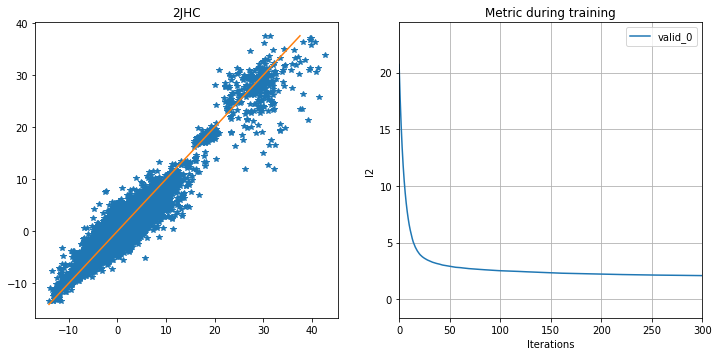

In [124]:
from models import LGBModel
from models import partition_data

# atom_count_ranges = [(1, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
# C_count_ranges = [(1, 5), (6, 6), (7, 7), (8, 9)]
#coupling_types = sorted(labelled_enh.type.unique())[0:1]
coupling_types = ['2JHC']
def test(data, count=5000):
    global model
    
    plt.figure(figsize=(25, 25))
#     for i, (t, (min_atoms, max_atoms)) in enumerate(itertools.product(coupling_types, C_count_ranges), 1):
    for i, t in enumerate(coupling_types, 1):    
#         data_df = data[(data.type == t) & (data.nC >= min_atoms) & (data.nC <= max_atoms)]
        data_df = data[data.type == t].head(count)

        train_df, valid_df, test_df = partition_data(data_df)
        
        if len(train_df) < 10 or len(test_df) < 10:
            continue
            
        print(f'Training {len(train_df)} samples for {t}')

        model = LGBModel(dict(molecules=molecules, 
                              structures=structures),
                         dict(n_jobs=8,
                              max_depth=16,
                              boosting_type='gbdt',
                              num_leaves=65536, #128,
                              min_child_samples=20,
                              min_data_in_leaf=100,
                              learning_rate=0.1,
                              n_estimators=1000,
                              reg_alpha=0.1,
                              reg_lambda=0.3,
                              bagging_fraction = 0.9,
                              bagging_freq = 5,
                              num_iterations=300,
#                               verbose=500
                             ))
  

        model.fit(train_df, train_df, valid_df, valid_df)
        output, score = model.evaluate(test_df, test_df)
        
        print(f'{t} score: {score} (trained on {len(train_df)} elements)')
        plt.subplot(4, 4, 2 * i - 1)
        plt.plot(test_df.scalar_coupling_constant, output, '*')
        mn = min(test_df.scalar_coupling_constant.min(), output.min())
        mx = min(test_df.scalar_coupling_constant.max(), output.max())
        plt.plot([mn, mx], [mn, mx])
        plt.title(t)
        
        ax = plt.subplot(4, 4, 2 * i)
        model.plot_metric(ax=ax)
    plt.show()
        
test(labelled_enh, 100000)


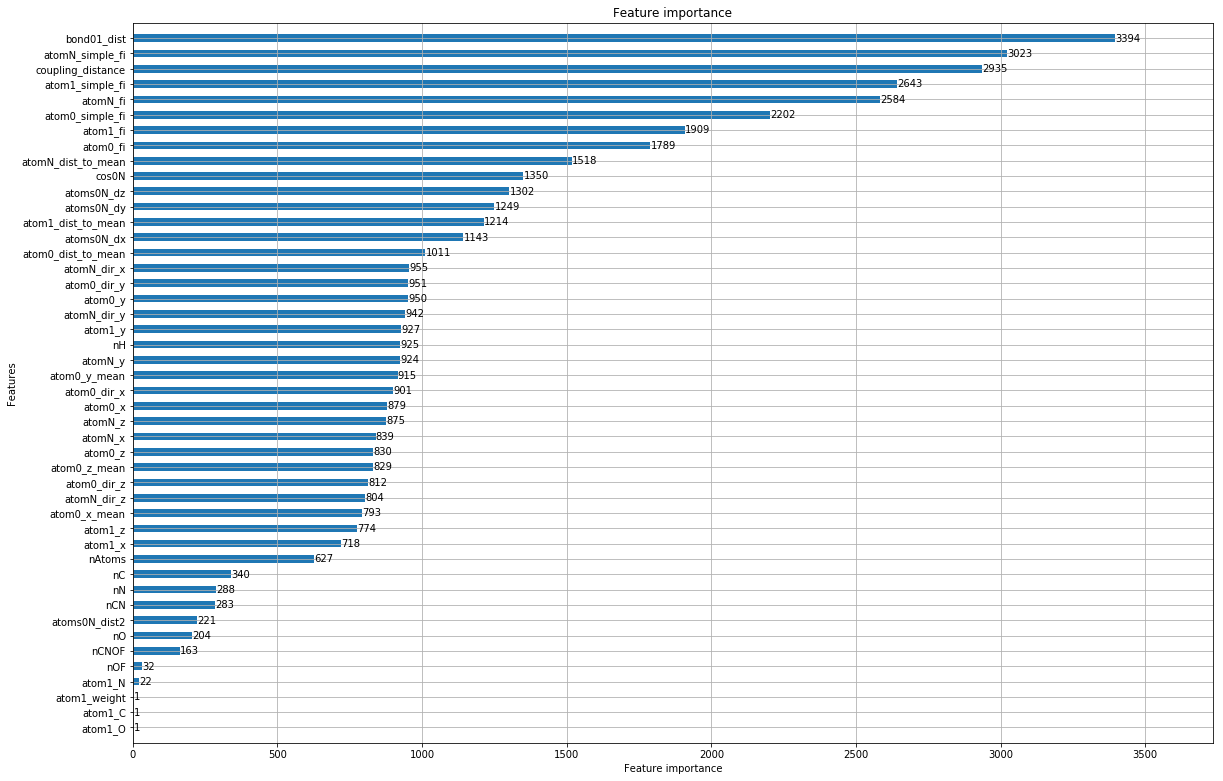

In [125]:
from models import LGBModel
fig = plt.figure(figsize=(15, 10))
model.plot_importance(ax=fig.add_axes([0, 0, 1, 1]), height=0.5)
plt.show()

In [ ]:
def train(data):
    models = {}
    for t in sorted(data.type.unique()):
        train_df = data[data.type == t]
        print(f'Training {len(train_df)} samples for {t}')
        model = LGBModel(dict(molecules=molecules, 
                              structures=structures),
                         dict(n_jobs=8,
                              max_depth=9,
                              boosting_type='gbdt',
                              num_leaves=128,
                              min_child_samples=20,
                              learning_rate=0.2,
                              n_estimators=1000,
                              reg_alpha=0.1,
                              reg_lambda=0.3,
                              subsample_freq = 1,
                              subsample = 0.9))
        models[t] = model
        model.fit(train_df, train_df)
    
    return models

models = train(labelled_enh)

In [ ]:
def predict(data, models):
    out_df = None
    
    for t in sorted(data.type.unique()):
        predict_df = data[data.type == t]
        print(f'Predicting {len(predict_df)} samples for {t}')
        output = models[t].predict(predict_df)
        
        id = predict_df['id']
        out_df_coupling = pd.DataFrame(data={'id':id, 'scalar_coupling_constant':output}, index=predict_df.index)
        
        if out_df is None:
            out_df = out_df_coupling
        else:
            out_df = out_df.append(out_df_coupling).sort_index()

    return out_df.sort_index()
    
#%prun -s cumulative f(unlabelled.head(10000))
prediction = predict(unlabelled_enh, models)

In [ ]:
prediction.head()

In [ ]:
prediction.to_csv('../data/pred.csv',index=False)